# Diagnosis of Heart Disease:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df=pd.read_csv('./heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.shape

(303, 14)

In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<AxesSubplot:>

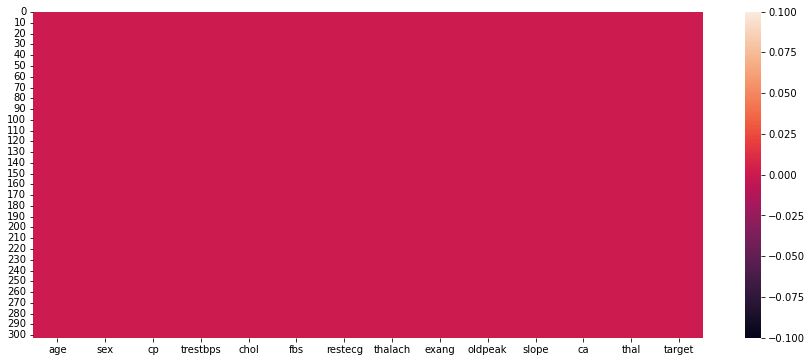

In [7]:
plt.figure(figsize=(15,6))
sns.heatmap(df.isnull())

#no null values in the data set

## 1. Number of people suffering from heart disease ?

In [8]:
s=0
for i in df['target']:
    if (i==1):
        s=s+1
    else:
        continue
print(s)

#165 People suffer from heart disease

165


<AxesSubplot:xlabel='target', ylabel='count'>

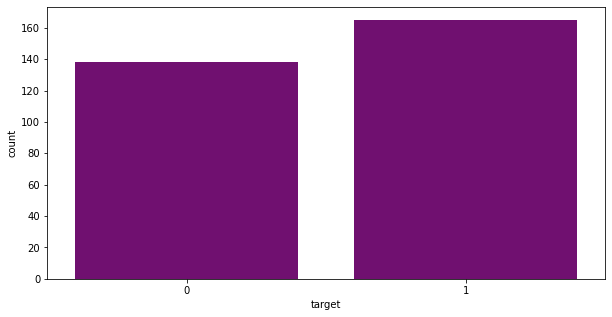

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['target'],color='purple')

## 2. Number of male and female having heart disease ?

In [10]:
m=0
for i in df.index:
    if(df['sex'][i]==1 and df['target'][i]==1):
        m=m+1
    else:
        continue
print(m)

#93 male are suffering from heart disease   

93


In [11]:
f=0
for i in df.index:
    if(df['sex'][i]==0 and df['target'][i]==1):
        f=f+1
    else:
        continue
print(f)

#72 female are suffering from heart disease

72


In [12]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [13]:
df1=df.groupby('sex')['target'].value_counts()
df1

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

<AxesSubplot:xlabel='sex,target'>

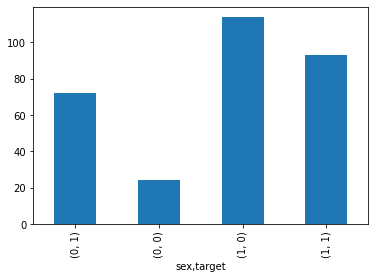

In [14]:
df1.plot.bar()

## 3. Visualize frequency distribution of the "thalach" variable and find what's the heart rate and heart disease relation ?

<Figure size 792x432 with 0 Axes>

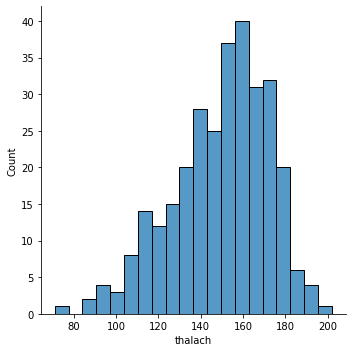

In [15]:
plt.figure(figsize=(11,6))
sns.displot(df['thalach'],kde=False,bins=20)

#maximum have a "thalach" between 160-170 i.e person having heart rate 160-170 suffer from heart disease

## 4. Correlation Matrix for all the variables with target.


In [16]:
correlation=df.corr()
print(correlation['target'].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


<AxesSubplot:>

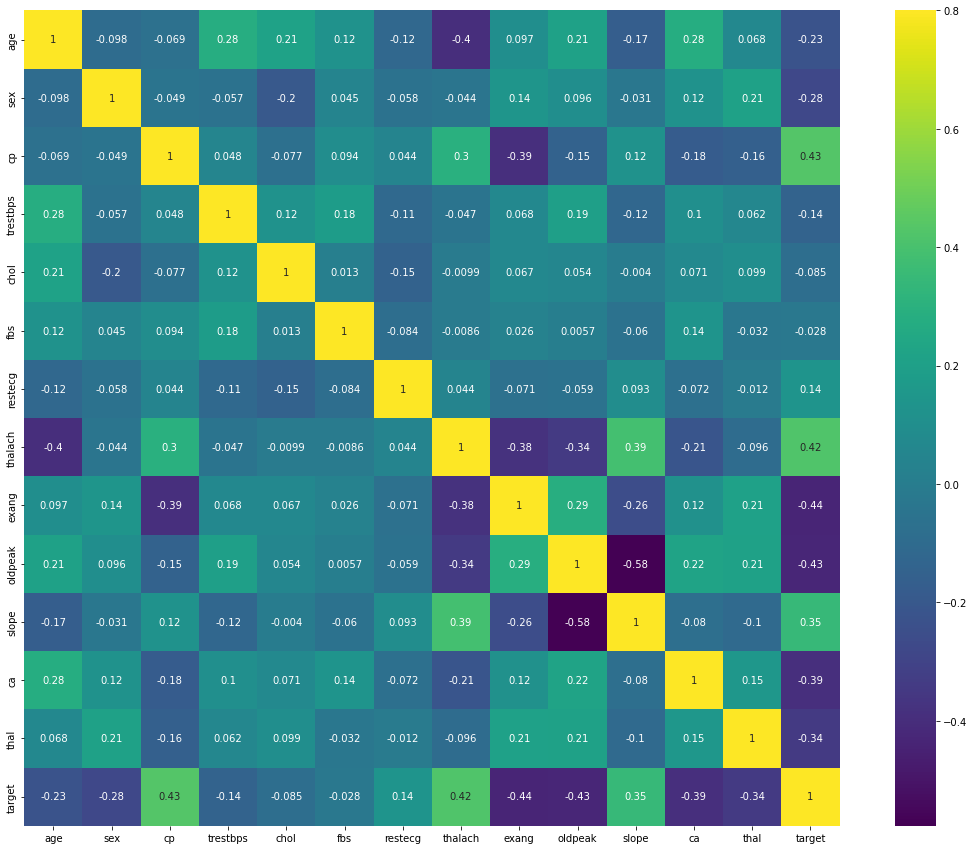

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(correlation,annot=True,cmap='viridis',square=True,vmax=0.8)

## 5. Age vs Heart Disease. Are young people more prone to heart disease ?


<AxesSubplot:xlabel='age', ylabel='count'>

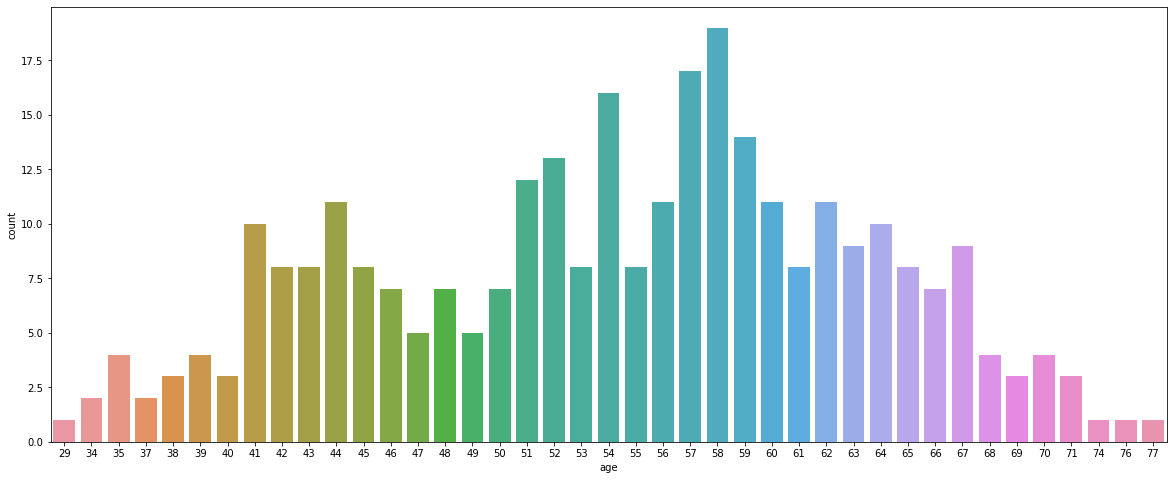

In [18]:
plt.figure(figsize=(20,8))
sns.countplot(x=df['age'])

#age of 52 - 60 are more prone to heart disease

## 6. Chest Pain types


In [19]:
df1=df['cp'].value_counts()
df1

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

<AxesSubplot:xlabel='Chest Pain', ylabel='cp'>

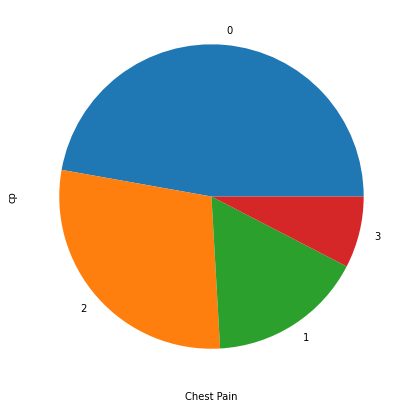

In [20]:
plt.figure(figsize=(10,7))
plt.xlabel('Chest Pain')
df1.plot.pie()

## 7. Maximum heart-rate achieved in non-heart disease patients ?


In [21]:
mx=0
for i in df.index:
    if (df['target'][i]==0):
        if(df['thalach'][i]>mx):
            mx=df['thalach'][i]
    else:
        continue
        
print(mx)

#max heart rate achieved is 195

195


# Feature Engineering:

In [22]:
for i in df.columns:
    print(i,df[i].unique())
    print('\n')

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]


sex [1 0]


cp [3 2 1 0]


trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]


chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]


fbs [

In [23]:
new_sex=pd.get_dummies(data=df['sex'],prefix='sex')
new_cp=pd.get_dummies(df['cp'],prefix='chestPain')
new_exang=pd.get_dummies(df['exang'],prefix='exang')
new_slope=pd.get_dummies(df['slope'],prefix='slope')
new_thal=pd.get_dummies(df['thal'],prefix='thal')
new_ca=pd.get_dummies(df['ca'],prefix='ca')

In [24]:
app=[df,new_sex,new_cp,new_ca,new_thal,new_exang,new_slope]

In [25]:
df1=pd.concat(app,axis=1)

In [26]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,0,1,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,0,0,1,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,0,0,0,1,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,0,0,0,1,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,1,0,0,1,0,0,1


In [27]:
df1.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target', 'sex_0', 'sex_1',
       'chestPain_0', 'chestPain_1', 'chestPain_2', 'chestPain_3', 'ca_0',
       'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1', 'thal_2', 'thal_3',
       'exang_0', 'exang_1', 'slope_0', 'slope_1', 'slope_2'],
      dtype='object')

In [28]:
df1.drop(['sex','cp','thal','exang','ca','slope'],axis=1,inplace=True)

In [29]:
df1.head()

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,target,sex_0,sex_1,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,145,233,1,0,150,2.3,1,0,1,...,0,0,1,0,0,1,0,1,0,0
1,37,130,250,0,1,187,3.5,1,0,1,...,0,0,0,1,0,1,0,1,0,0
2,41,130,204,0,0,172,1.4,1,1,0,...,0,0,0,1,0,1,0,0,0,1
3,56,120,236,0,1,178,0.8,1,0,1,...,0,0,0,1,0,1,0,0,0,1
4,57,120,354,0,1,163,0.6,1,1,0,...,0,0,0,1,0,0,1,0,0,1


In [30]:
df1.shape

(303, 28)

# ML Algorithms:

In [31]:
#Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Splitting
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [32]:
cv=ShuffleSplit(n_splits=10,test_size=0.3,random_state=42)

# Logistic Regression >

In [33]:
lr=LogisticRegression(max_iter=5000)

In [34]:
x=df1.drop('target',axis=1)
x

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,chestPain_0,...,ca_4,thal_0,thal_1,thal_2,thal_3,exang_0,exang_1,slope_0,slope_1,slope_2
0,63,145,233,1,0,150,2.3,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1,37,130,250,0,1,187,3.5,0,1,0,...,0,0,0,1,0,1,0,1,0,0
2,41,130,204,0,0,172,1.4,1,0,0,...,0,0,0,1,0,1,0,0,0,1
3,56,120,236,0,1,178,0.8,0,1,0,...,0,0,0,1,0,1,0,0,0,1
4,57,120,354,0,1,163,0.6,1,0,1,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,1,123,0.2,1,0,1,...,0,0,0,0,1,0,1,0,1,0
299,45,110,264,0,1,132,1.2,0,1,0,...,0,0,0,0,1,1,0,0,1,0
300,68,144,193,1,1,141,3.4,0,1,1,...,0,0,0,0,1,1,0,0,1,0
301,57,130,131,0,1,115,1.2,0,1,1,...,0,0,0,0,1,0,1,0,1,0


In [35]:
#x=df.drop('target',axis=1)
#x

In [36]:
y=df1['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [37]:
#y=df['target']
#y

In [38]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy'))

[0.86813187 0.83516484 0.86813187 0.89010989 0.84615385 0.86813187
 0.86813187 0.82417582 0.89010989 0.79120879]


In [39]:
print(cross_val_score(lr,x,y,cv=cv,scoring='accuracy').mean())

0.8549450549450551


# Support Vector Machine (SVM) >

In [40]:
svc=SVC()

In [41]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy'))

[0.69230769 0.57142857 0.58241758 0.67032967 0.61538462 0.63736264
 0.62637363 0.68131868 0.59340659 0.62637363]


In [42]:
print(cross_val_score(svc,x,y,cv=cv,scoring='accuracy').mean())

0.6296703296703295


# Decision Tree Classification >

In [43]:
dt=DecisionTreeClassifier()

In [44]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy'))

[0.78021978 0.81318681 0.74725275 0.76923077 0.75824176 0.76923077
 0.79120879 0.71428571 0.76923077 0.68131868]


In [45]:
print(cross_val_score(dt,x,y,cv=cv,scoring='accuracy').mean())

0.7494505494505495


# Random Forest Classification >

In [46]:
rf=RandomForestClassifier()

In [47]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy'))

[0.79120879 0.84615385 0.82417582 0.8021978  0.79120879 0.83516484
 0.83516484 0.8021978  0.83516484 0.81318681]


In [48]:
print(cross_val_score(rf,x,y,cv=cv,scoring='accuracy').mean())

0.8175824175824176


---
# From the above 4 models, we came to know that Logistic Regression model gives the maximum accuracy i.e. 85.5%
---
### 85.49% - LR
### 62.96% - SVM
### 74.94% - DTC
### 81.75% - RFC

### > Min Accuracy = 62.9%
### > Max Accuracy = 85.5%

# Train, Test and Splitting:

## From cross-val score Logistic Regression gives the max accuracy 

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [50]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [51]:
prediction=lr.predict(x_test)

In [52]:
lr.score(x_train,y_train)

0.8773584905660378

In [55]:
confusion_matrix(y_test, prediction)

array([[34,  7],
       [ 5, 45]], dtype=int64)

In [56]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85        41
           1       0.87      0.90      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



### Model has an accuracy of 87%